In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 300)

In [46]:
colorcode=pd.read_csv('../data/processed/color_code.csv',index_col=0)
ibucode=pd.read_csv('../data/processed/IBU_code.csv',index_col=0)
colorcode

,Style,Color_code
0,Wheat,0
1,Pale Lager/Blonde Ale,1
2,Pale Ale,2
3,Strong Ale,3
4,Brown Ale,4
5,Stout/Porter,5


In [36]:
ibucode

,Style,IBU_code
0,Wheat,0
1,Pale Lager/Blonde Ale,1
2,Brown Ale,2
3,Strong Ale,3
4,Stout/Porter,4
5,Pale Ale,5


In [18]:
beer=pd.read_csv('../data/processed/clean_limited.csv',index_col=0)
beer.head()

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_color,Style_ibu
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Pale Lager/Blonde Ale,1,1
1,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,Pale Ale,2,5
2,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,Pale Ale,2,5
3,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Pale Lager/Blonde Ale,1,1
4,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,2,5


In [4]:
beer['Simple_style'].value_counts(normalize=True) #drop lower count ones?

Simple_style
Pale Ale                 0.559812
Stout/Porter             0.150129
Pale Lager/Blonde Ale    0.121518
Wheat                    0.078464
Strong Ale               0.054872
Brown Ale                0.035205
Name: proportion, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(beer,test_size=0.25,random_state=42)

SAVE TRAIN/TEST TO CSV

In [20]:
#exporting train & test before scaling
train.to_csv('../data/train/train.csv')
test.to_csv('../data/test/test.csv')

### First we'll try setting the Style_color as the target column

In [117]:
X_train=train[['ABV','IBU','Color']]
X_test=test[['ABV','IBU','Color']]

#First experiment with color code
yc_train=train['Style_color']
yc_test=test['Style_color']

(The scores were lower when scaling the data, both with MinMaxScaler and StandardScaler)

In [5]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()

In [64]:
# Xtrain_scaled=train.copy()
# Xtest_scaled=test.copy()
# col_toscale=['ABV', 'IBU', 'Color']

In [73]:
# Xtrain_scaled[col_toscale] = scaler.fit_transform(train[col_toscale])
# Xtest_scaled[col_toscale] = scaler.fit_transform(test[col_toscale])

In [13]:
# yc_test.value_counts()
# yi_test.value_counts()

In [9]:
test.head()

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_color,Style_ibu
39615,Clickbait XPA,American Pale Ale,10,6.20,45.08,5.00,Pale Ale,2,5
34103,Keg Camping,Double IPA,56,8.29,45.14,7.13,Pale Ale,2,5
11902,Eat My Hops Wheat,American Wheat or Rye Beer,15,5.47,27.92,4.25,Wheat,0,0
4273,ESB (Extra Scottish Bitter),Extra Special/Strong Bitter (ESB),68,5.00,40.05,15.00,Pale Ale,2,5
3396,Carlsbad Chronic Clone,American Amber Ale,4,5.78,30.41,14.78,Pale Ale,2,5


In [126]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, yc_train)

In [127]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=100000)

In [128]:
lr1.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=100000)

In [129]:
predictions = lr1.predict(X_test)
predicions_proba = lr1.predict_proba(X_test)
# predicions_proba

With Style_color as target

In [130]:
from sklearn.metrics import (multilabel_confusion_matrix, precision_score,recall_score,
                             f1_score, accuracy_score,confusion_matrix, classification_report)

print('accuracy_score',accuracy_score(yc_test, predictions))
print('precision_score',precision_score(yc_test, predictions, average='weighted'))
print('f1_score',f1_score(yc_test, predictions, average='weighted'))
print('recall_score',recall_score(yc_test, predictions, average='weighted'))
# print(classification_report(yc_test, predictions))

accuracy_score 0.7977733162985946
precision_score 0.8516055051739578
f1_score 0.8151642512466675
recall_score 0.7977733162985946


In [131]:
cm=multilabel_confusion_matrix(yc_test, predictions)
# cm

In [132]:
cm = confusion_matrix(yc_test, predictions,normalize='true')
# print(cm)

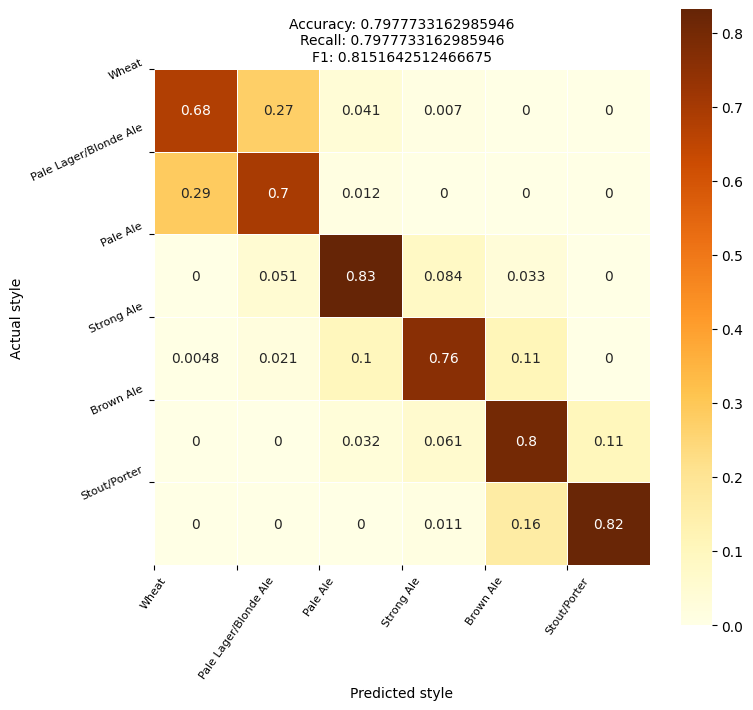

In [133]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'YlOrBr')
plt.ylabel('Actual style')
plt.xlabel('Predicted style')
all_sample_title = (f'Accuracy: {accuracy_score(yc_test, predictions)}\nRecall:
                    {recall_score(yc_test, predictions, average="weighted")}\nF1:
                    {f1_score(yc_test, predictions, average="weighted")}')
plt.title(all_sample_title, size = 10);
plt.xticks(ticks=range(len(colorcode.index)), labels=colorcode['Style'], rotation=55,fontsize=8);
plt.yticks(ticks=range(len(colorcode.index)), labels=colorcode['Style'],rotation=25,fontsize=8);

In [75]:
import pickle

In [96]:
# with open('../models/lr1', 'wb') as output:
#     pickle.dump(lr1, output)

In [98]:
# with open('../models/lr1', 'rb') as input:
#     modelo_importado = pickle.load(input) 

### Let's try with the IBU style now

In [84]:
#Second experiment with ibu code
X_train=train[['ABV','IBU','Color']]
X_test=test[['ABV','IBU','Color']]

#First experiment with color code
yi_train=train['Style_ibu']
yi_test=test['Style_ibu']

In [78]:
# from sklearn.preprocessing import StandardScaler
# scalers = StandardScaler()

In [109]:
# Xtrain_scaled[col_toscale] = scalers.fit_transform(train[col_toscale])
# Xtest_scaled[col_toscale] = scalers.fit_transform(test[col_toscale])

In [85]:
rus = RandomUnderSampler(random_state=42)

X_resampleds, y_resampleds = rus.fit_resample(X_train, yi_train)

In [86]:
lr2 = LogisticRegression(max_iter=100000)
lr2.fit(X_resampleds, y_resampleds)

LogisticRegression(max_iter=100000)

In [87]:
predictions2 = lr2.predict(X_test)
predicions_probas = lr2.predict_proba(X_test)
predicions_probas

array([[1.88413956e-04, 3.02362670e-03, 1.14468558e-03, 6.17335674e-02,
        1.51241982e-06, 9.33908194e-01],
       [2.61520566e-06, 1.43999108e-05, 7.98894552e-04, 6.54575477e-01,
        3.32594818e-06, 3.44605287e-01],
       [2.70245265e-01, 6.69322687e-01, 8.17011732e-05, 3.29990344e-03,
        7.28459025e-08, 5.70503705e-02],
       ...,
       [6.01234083e-13, 1.43450393e-16, 6.76423810e-01, 1.90055900e-02,
        3.04323095e-01, 2.47505227e-04],
       [2.73627204e-13, 4.87142313e-13, 9.71271859e-02, 6.69296767e-01,
        2.98169030e-03, 2.30594356e-01],
       [1.61145939e-09, 2.04241358e-11, 6.90597465e-01, 2.29843029e-01,
        4.35073966e-02, 3.60521070e-02]])

In [88]:
print('accuracy_score',accuracy_score(yi_test, predictions2))
print('precision_score',precision_score(yi_test, predictions2, average='weighted'))
print('f1_score',f1_score(yi_test, predictions2, average='weighted'))
print('recall_score',recall_score(yi_test, predictions2, average='weighted'))

accuracy_score 0.7979558313560868
precision_score 0.8527160358650502
f1_score 0.815595995333007
recall_score 0.7979558313560868


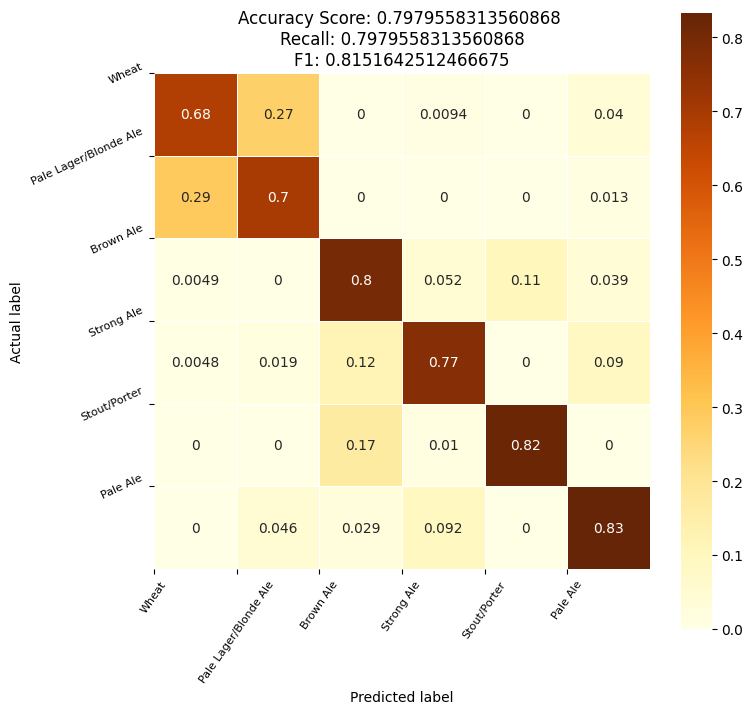

In [95]:
cms = confusion_matrix(yi_test, predictions2,normalize='true')
# print(cm)
plt.figure(figsize=(8,8))
sns.heatmap(cms, annot=True, linewidths=.5, square = True, cmap = 'YlOrBr')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {accuracy_score(yi_test, predictions2)} \nRecall: {recall_score(yi_test, predictions2, average="weighted")}\nF1: {f1_score(yc_test, predictions, average="weighted")}'
plt.title(all_sample_title, size = 12);
plt.xticks(ticks=range(len(ibucode.index)), labels=ibucode['Style'], rotation=55,fontsize=8);
plt.yticks(ticks=range(len(ibucode.index)), labels=ibucode['Style'],rotation=25,fontsize=8);

```Python
                Predicted Class 1 | Predicted Class 2 | ... | Predicted Class N
Actual Class 1   True Positive    | False Negative    | ... | False Negative
Actual Class 2   False Positive   | True Positive     | ... | False Negative
...             ...               | ...               | ... | ...
Actual Class N   False Positive   | False Negative    | ... | True Positive
```

Both mappings provided pretty similar results, so we'll probably keep the color_code one.